# Titanic Dataset: Exploratory Data Analysis

### Get data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Get csv
df_train = pd.read_csv("../../dataset/train.csv")
df_test = pd.read_csv("../../dataset/test.csv")


### Preparing data: NULLS and features

Profiling the data, we could observe that Age, Cabin and Embarked present nulls values. Data is also explained in [Kaggle data documentation](https://www.kaggle.com/c/titanic/data)

In [2]:
# Profiling Train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


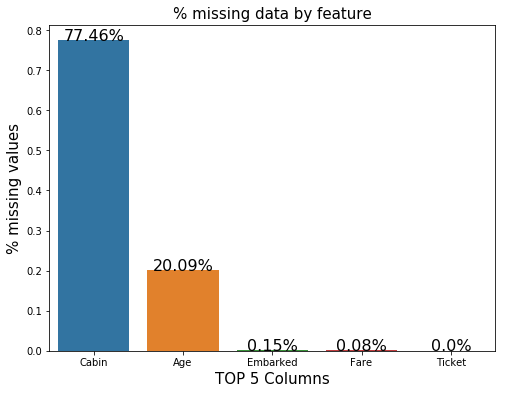

In [4]:
##Visualzation of Null data

N_FEATURE_DISPLAY = 5

# Concatenate train & test
dataset = pd.concat(objs=[df_train.drop(columns=['Survived']), df_test], axis=0)
percent_null = (dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0]).iloc[:N_FEATURE_DISPLAY]
percent_null = pd.DataFrame({'feature':percent_null.index, 'percent':percent_null.values})
fig, ax = plt.subplots(figsize=(8, 6))
#plt.xticks(rotation='90')
g = sns.barplot(x='feature', y='percent',data=percent_null)

for index, row in percent_null.iterrows():
    g.text(row.name,row.percent,
           '{0}%'.format(round(row.percent*100,2))
           ,color='black'
           ,ha="center"
           ,fontsize=16
          )

plt.xlabel('TOP 5 Columns', fontsize=15)
plt.ylabel('% missing values', fontsize=15)
plt.title('% missing data by feature', fontsize=15)

plt.show()

### What to do with NULLS

I decided to:

 * Drop **Cabin** feature from analysis becuase it has too much missing values
 * Drop **Age**, **Embarked** and **Fare** Null values (reduce the data scale in 7%).

In [5]:
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])
df_train = df_train.dropna()
df_test = df_test.dropna()

In [6]:
#Final Dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


The data is reduced to 80%

### EDA report

For reading data and performing EDA operations, I’ll primarily use the **numpy** and **pandas** Python packages, which offer simple API's that allow us to plug our data sources and perform our desired operation. For the output, we’ll be using the **Seaborn** package which is a Python-based data visualization library built on **Matplotlib**.

1 - Plot bar distribution of categorical columns
2 - Plot univariate distribution of numerical columns

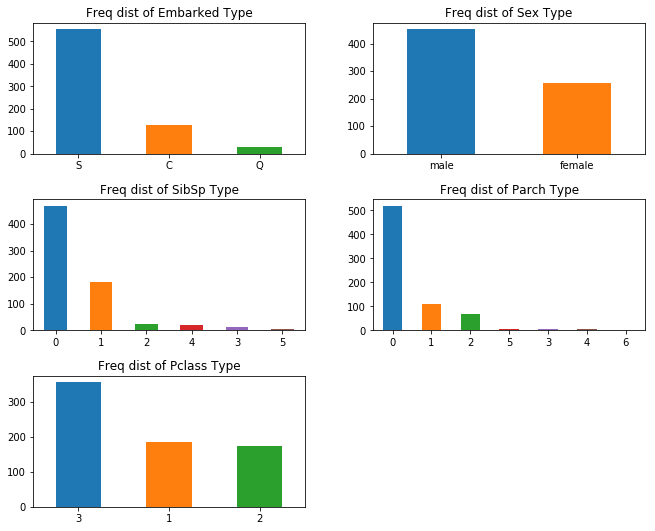

In [25]:
# 2 - Plot bar distribution
import seaborn as sns
from matplotlib import pyplot as plt

col_names = ['Embarked','Sex', 'SibSp', 'Parch', 'Pclass']

plt.figure(figsize=(10,8))
for i,column in enumerate(col_names):
    plt.subplot(3, 2, i+1)
    g = df_train[column].value_counts().plot.bar(title="Freq dist of {0} Type".format(column))
    for item in g.get_xticklabels():
        item.set_rotation(0)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.25)

plt.show()


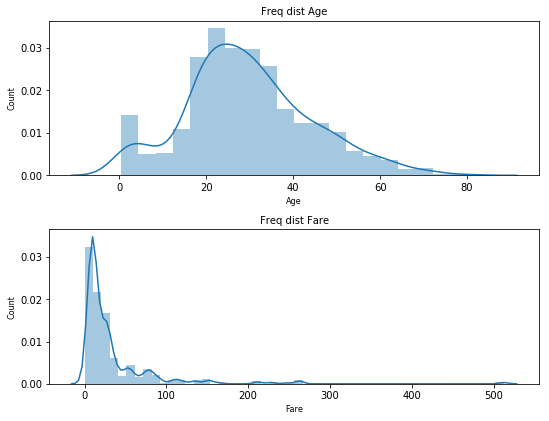

In [15]:
import seaborn as sns

col_names = ['Age','Fare']

fig, ax = plt.subplots(len(col_names), figsize=(8,6))

for i, col_val in enumerate(col_names):

    g = sns.distplot(df_train[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

#matplotlib.rc('xtick', labelsize=1) 
#matplotlib.rc('ytick', labelsize=2)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.25)
plt.show()